In [404]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [405]:
# these are all foldedSFS

In [406]:
sfs_df = pd.read_csv('data/results/a_fusca_sfs.tsv', sep='\t')

In [407]:
sfs_df

,degeneracy,linkage,iton,sum,one,two,three,four
0,0D,A,0,14787345,3259828,3694213,4301671.0,3531633.0
1,0D,A,1,18512,5422,7051,2735.0,3304.0
2,0D,A,2,8525,2430,3606,1262.0,1227.0
3,0D,A,3,6216,1789,2263,1240.0,924.0
4,0D,A,4,5898,2045,1745,1537.0,571.0
5,0D,A,5,5334,1774,1669,1156.0,735.0
6,0D,A,6,4791,1532,1390,1361.0,508.0
7,0D,A,7,4706,1434,1379,1367.0,526.0
8,0D,A,8,4836,1502,1301,1613.0,420.0
9,0D,A,9,4577,1660,1510,926.0,481.0


In [408]:
zero_A_sfs = sfs_df[(sfs_df['degeneracy']=='0D') & (sfs_df['linkage']=='A')].reset_index()['sum']
four_A_sfs = sfs_df[(sfs_df['degeneracy']=='4D') & (sfs_df['linkage']=='A')].reset_index()['sum']
zero_X_sfs = sfs_df[(sfs_df['degeneracy']=='0D') & (sfs_df['linkage']=='X')].reset_index()['sum']
four_X_sfs = sfs_df[(sfs_df['degeneracy']=='4D') & (sfs_df['linkage']=='X')].reset_index()['sum']

In [409]:
def norm_sfs(sfs):
    sfs = sfs.to_numpy(dtype=float)[1:]
    sfs/=np.sum(sfs)
    return sfs

In [410]:
zero_A_sfs_norm = norm_sfs(zero_A_sfs)
four_A_sfs_norm = norm_sfs(four_A_sfs)
zero_X_sfs_norm = norm_sfs(zero_X_sfs)
four_X_sfs_norm = norm_sfs(four_X_sfs)

In [415]:
nsamp = len(zero_A_sfs_norm)
sfs_exp_un = [1/i for i in range(1,2*nsamp)]
sfs_exp_un /= np.sum(sfs_exp_un)
flipped = np.flip(sfs_exp_un)
sfs_exp = sfs_exp_un + flipped #sum them together for the 'folding'
sfs_exp = sfs_exp[0:nsamp] # only look at the minor allele counts
#sfs_exp[-1] = sfs_exp[-1]/2 # because we've counted the entry for this twice

In [416]:
len(sfs_exp)

12

In [417]:
a_sfs_df = pd.DataFrame({'degeneracy': ['exp']*nsamp+['0D']*nsamp+['4D']*nsamp,
                         'itons':np.tile(np.arange(1, nsamp+1),3),
                         'sfs': np.concatenate((sfs_exp, zero_A_sfs_norm, four_A_sfs_norm))
                        })

x_sfs_df = pd.DataFrame({'degeneracy': ['exp']*nsamp+['0D']*nsamp+['4D']*nsamp,
                         'itons':np.tile(np.arange(1, nsamp+1),3),
                         'sfs': np.concatenate((sfs_exp, zero_X_sfs_norm, four_X_sfs_norm))
                        })

Text(0.06, 0.5, 'Normalised SFS')

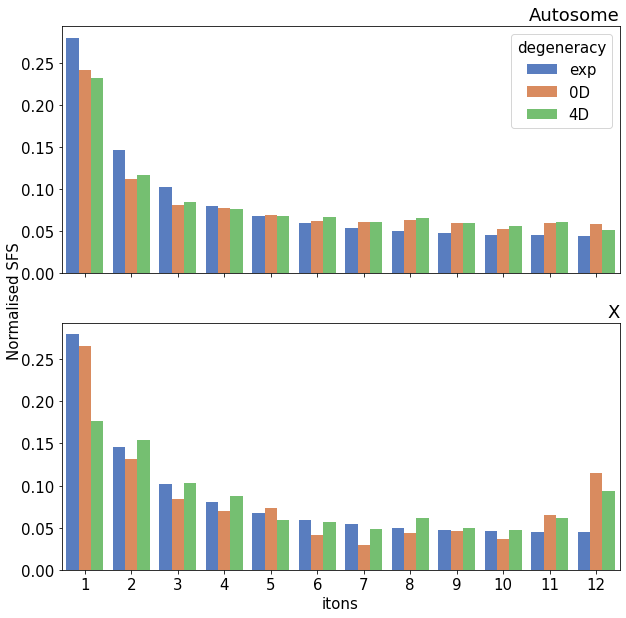

In [418]:
plt.rcParams.update({'font.size':15})
sns.set_palette('muted')

fig, axs = plt.subplots(nrows = 2, figsize = [10,10], sharex=True)

a_ax = axs[0]
x_ax = axs[1]

sns.barplot(data = a_sfs_df,
            x='itons', 
            y = 'sfs', 
            hue = 'degeneracy', 
            ax = a_ax)

sns.barplot(data = x_sfs_df,
            x='itons', 
            y = 'sfs', 
            hue = 'degeneracy', 
            ax = x_ax)

a_ax.set_title('Autosome', loc='right')
a_ax.set_xlabel('')
a_ax.set_ylabel('')
#a_ax.set_ylim([0,0.35])

x_ax.set_title('X', loc='right')
x_ax.set_ylabel('')
x_ax.get_legend().remove()
#x_ax.set_ylim([0,0.35])

fig.text(0.06, 0.5, 'Normalised SFS', ha='center', va='center', rotation='vertical')

## 1 male sample, so 23 possible haplotypes, i dont think?

In [473]:
(np.arange(len(zero_A_sfs))/(2*len(zero_A_sfs[1:])))

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       ])

In [472]:
zero_A_sfs * (np.arange(len(zero_A_sfs))/(2*len(zero_A_sfs[1:])))

0        0.000000
1      771.333333
2      710.416667
3      777.000000
4      983.000000
5     1111.250000
6     1197.750000
7     1372.583333
8     1612.000000
9     1716.375000
10    1695.416667
11    2091.375000
12    2248.500000
Name: sum, dtype: float64

In [463]:
def get_maf(sfs):
    return np.sum(sfs * (np.arange(len(sfs))/(2*len(sfs[1:]))))/np.sum(sfs)

In [469]:
print(f'0D A MAF: {round(get_maf(zero_A_sfs), 6)}')
print(f'4D A MAF: {round(get_maf(four_A_sfs), 6)}')
print(f'0D X MAF: {round(get_maf(zero_X_sfs), 6)}')
print(f'4D X MAF: {round(get_maf(four_X_sfs), 6)}')

0D A MAF: 0.001096
4D A MAF: 0.004028
0D X MAF: 0.000178
4D X MAF: 0.00061


In [474]:
0.004028/(4*mu)

287714.28571428574

In [430]:
# with folded this should be the minor allele frequency?
def get_sfs_mean(sfs):
    return np.sum(sfs * np.arange(len(sfs)))/np.sum(sfs) 

In [399]:
## need invariant sites for wattersons theta for total
## does it work for folded sfs?
## really need to get my head around calculating theta etc for these PGE systems..

def get_wattersons_theta(sfs, nsamp):

    wattersons_correction = np.sum([1/i for i in range(1,nsamp+1)])
    wattersons_theta = np.sum(sfs[1:])/(np.sum(sfs) *  wattersons_correction)
    
    return wattersons_theta

In [400]:
print(get_wattersons_theta(zero_A_sfs, nsamp))
print(get_wattersons_theta(four_A_sfs, nsamp))
print(get_wattersons_theta(zero_X_sfs, nsamp))
print(get_wattersons_theta(four_X_sfs, nsamp))

0.0016590311213907278
0.006095384397517714
0.0002702222548786709
0.000885581938882389


In [421]:
print(0.0016590311213907278/0.006095384397517714)
print(0.0002702222548786709/0.000885581938882389)

0.2721782603352058
0.3051352370845473


In [401]:
print(zero_A_sfs[1]/np.sum(zero_A_sfs))
print(four_A_sfs[1]/np.sum(four_A_sfs))
print(zero_X_sfs[1]/np.sum(zero_X_sfs))
print(four_X_sfs[1]/np.sum(four_X_sfs))

0.0012454361647024743
0.004385099677584888
0.0002224012700865187
0.00048541263102733304


In [420]:
mu = 3.5e-9

print(get_wattersons_theta(zero_A_sfs, nsamp)/(4*mu))
print(get_wattersons_theta(four_A_sfs, nsamp)/(4*mu))
print(get_wattersons_theta(zero_X_sfs, nsamp)/(4*mu))
print(get_wattersons_theta(four_X_sfs, nsamp)/(4*mu))

118502.22295648056
435384.59982269385
19301.58963419078
63255.85277731351


In [403]:
print(zero_A_sfs[1]/(np.sum(zero_A_sfs)*4*mu))
print(four_A_sfs[1]/(np.sum(four_A_sfs)*4*mu))
print(zero_X_sfs[1]/(np.sum(zero_X_sfs)*4*mu))
print(four_X_sfs[1]/(np.sum(four_X_sfs)*4*mu))

88959.72605017673
313221.4055417777
15885.805006179906
34672.33078766665
